In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import colormaps as cm
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans
import clustergraph.clustergraph as cg

data = pd.read_csv("data/noisy_circles.csv", sep=",", header=None)
X = data.to_numpy()
print(X.shape)

model_KM = KMeans(20, random_state=42)
prediction_KM = model_KM.fit_predict(X)

model_DB = DBSCAN(eps=0.2, min_samples=5)
predict_DB = model_DB.fit_predict(X)
X1 = X[predict_DB == 0]
X2 = X[predict_DB == 1]
colors = []

# Get one cluster per circle in order to have the corresponding labels
for i in range(len(predict_DB)):
    if predict_DB[i] == 0:
        colors.append("#3182bd")
    else:
        colors.append("#a1d99b")

labels_circles = np.array(colors)
print(np.unique(predict_DB))

(500, 2)
[0 1]


Number connected components :  2


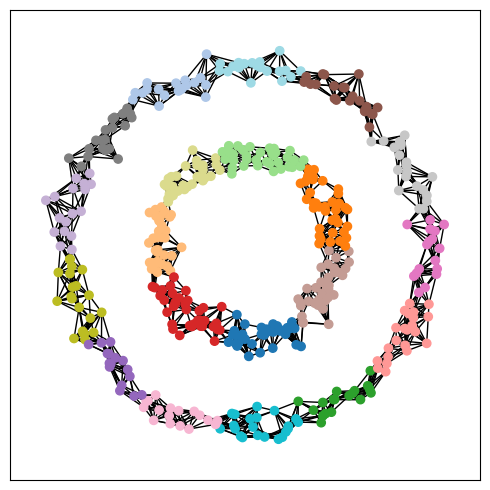

In [3]:
nb = 10
neigh = NearestNeighbors(n_neighbors=nb, radius=1)
neigh.fit(X=X)
nn_adjacency = neigh.kneighbors_graph(X=X, n_neighbors=nb, mode="distance")
nn_Graph = nx.from_scipy_sparse_array(nn_adjacency, edge_attribute="weight")

for node in nn_Graph.nodes:
    nn_Graph.remove_edge(node, node)
print("Number connected components : ", nx.number_connected_components(nn_Graph))

fig, ax = plt.subplots(figsize=(5, 5))
nx.draw_networkx_edges(
    nn_Graph,
    pos={i: p for i, p in enumerate(X)},
    ax=ax,
)
ax.scatter(X[:, 0], X[:, 1], c=prediction_KM, cmap="tab20")
ax.axis("equal")

plt.tight_layout()
# plt.savefig("circles_kmeans.pdf")
plt.show()

### ClusterGraph's creation and pruning

In [6]:
cluster_g.graph.edges(data=True)

EdgeDataView([(0, 1, {'weight': 1.4716495329810066, 'weight_plot': 0.6673506399001917, 'color': '#000000'}), (0, 2, {'weight': 0.8058683276199882, 'weight_plot': 0.2568639043486683, 'color': '#000000'}), (0, 3, {'weight': 0.7819980144972928, 'weight_plot': 0.24214668669303513, 'color': '#000000'}), (0, 4, {'weight': 0.583830476218566, 'weight_plot': 0.11996668938264711, 'color': '#000000'}), (0, 5, {'weight': 0.9988539556792679, 'weight_plot': 0.3758490001016468, 'color': '#000000'}), (0, 6, {'weight': 0.44801455974594473, 'weight_plot': 0.03622952206721648, 'color': '#000000'}), (0, 7, {'weight': 0.7951425056846418, 'weight_plot': 0.25025090957366586, 'color': '#000000'}), (0, 8, {'weight': 0.8387884979931468, 'weight_plot': 0.27716080243089986, 'color': '#000000'}), (0, 9, {'weight': 1.2836904939607587, 'weight_plot': 0.5514646825863532, 'color': '#000000'}), (0, 10, {'weight': 1.4181937396615911, 'weight_plot': 0.6343925240517497, 'color': '#000000'}), (0, 11, {'weight': 0.436929733

In [5]:
from clustergraph.utils import get_clusters_from_scikit

cluster_g = cg.ClusterGraph(
    clusters=get_clusters_from_scikit(prediction_KM), X=X, metric_clusters="average"
)
# Coloring the graph
cluster_g.fit_graph(
    node_type_coloring="label",
    node_color_labels=prediction_KM,
    node_palette=cm.get_cmap("tab20"),
)

# Distortion pruning
metric_distortion_graph, md = cluster_g.prune_distortion(knn_g=10, score=True)

# Connectivity pruning
connectivity_graph, conn = cluster_g.prune_conn(score=True)

### Plot of the metric distortion and connectivity

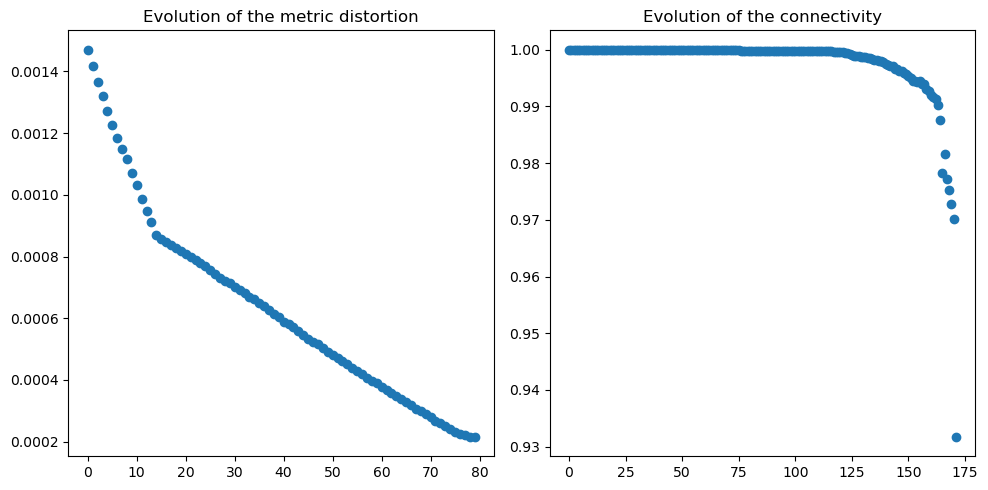

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.scatter(range(len(md)), md)
ax1.set_title("Evolution of the metric distortion")

ax2.scatter(range(len(conn)), conn)
ax2.set_title("Evolution of the connectivity")

plt.tight_layout()
plt.show()

# Graph after the metric distortion pruning

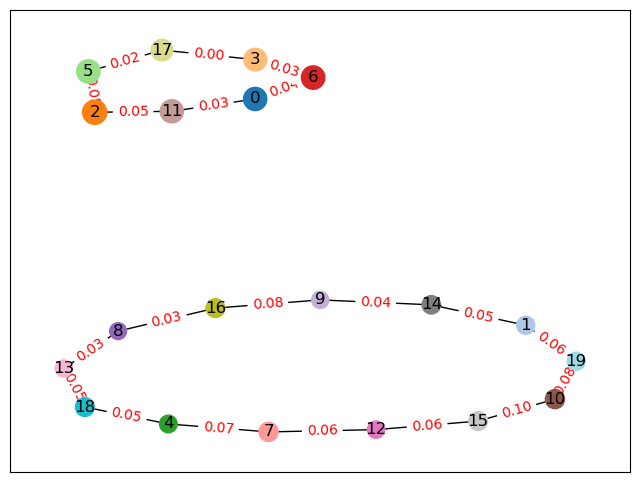

In [5]:
import clustergraph.plot_graph as pg

metric_distortion_graph = cluster_g.prune_distortion()
pg.plot_colored_graph(metric_distortion_graph, size_nodes=1000, random_state=42)

### Merge of disconnected components

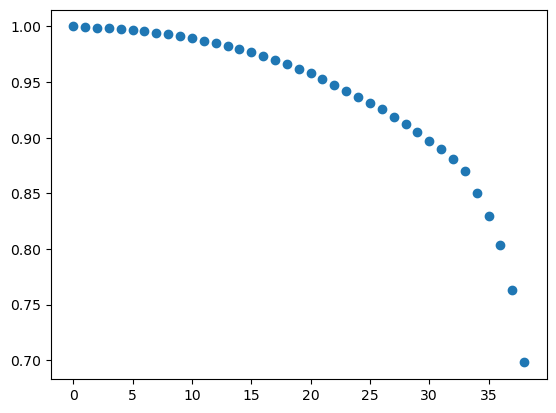

In [6]:
merged_graph, connectivity = cluster_g.merge_graph(k_compo=3, score=True)
plt.scatter(range(len(connectivity)), connectivity)

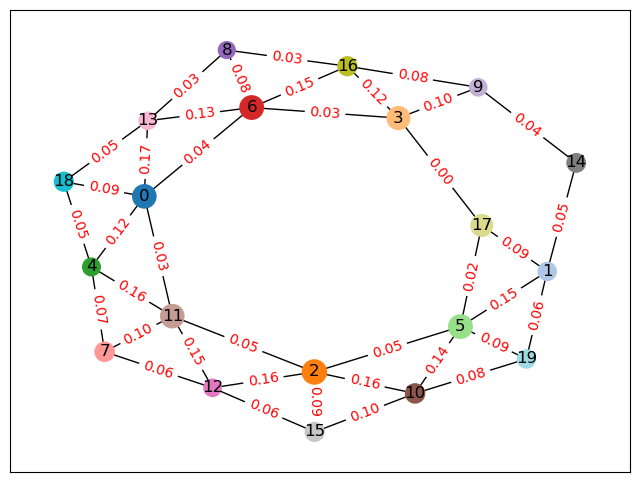

In [7]:
merged_graph = cluster_g.merge_graph(20, k_compo=3)
pg.plot_colored_graph(merged_graph, size_nodes=1000, random_state=42)

## Connectivity Pruning : Graph with 0.99% of the connectivity kept

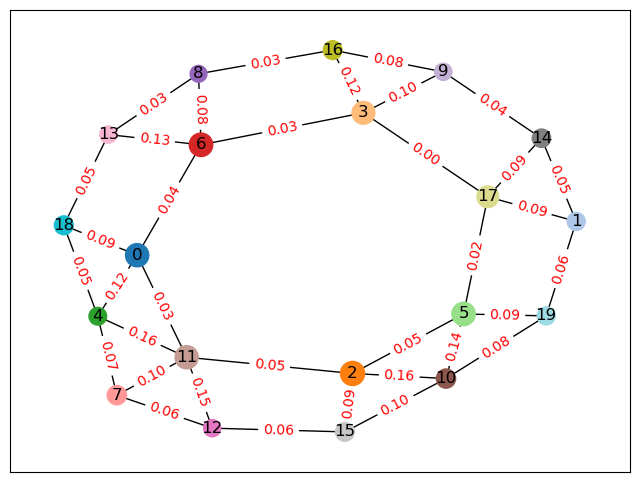

In [8]:
import clustergraph.plot_graph as pg

connectivity_graph = cluster_g.prune_conn(nb_edge_pruned=155)
pg.plot_colored_graph(connectivity_graph, size_nodes=1000, random_state=42)